---------------------
## Novelty and Outlier Detection
---------------

Many applications require being able to decide whether a new observation belongs to the same distribution as existing observations (it is an __inlier__), or should be considered as different (it is an __outlier__). 

Two important distinctions must be made:

|__outlier detection__:|__novelty detection__:|
|----------------------|----------------------|
|- The __training data contains outliers__ which are defined as observations that are far from the others. |- The __training data is not polluted by outliers__ and we are interested in detecting whether a new observation is an outlier. |
|- Outlier detection estimators thus try to fit the regions where the training data is the most concentrated, ignoring the deviant observations.|- In this context an outlier is also called a novelty.|
|- __Outlier__ detection is also known as __unsupervised__| anomaly detection and __novelty__ detection as __semi-supervised__ anomaly detection.|
    




    
 

#### Basics ...

Consider a few questions ...

- Are there an unusual amount of login attempts from a particular IP address?
- Are any customers buying more than the typical number of products at a given hour?
- Which homes are consuming above-average amounts of water during a drought?
- Which judges convict an unusual number of defendants?
- Should a patient's blood tests be considered normal, or are there outliers that require further checks and examinations?

In all of those cases, we can set thresholds for __minimum__ and __maximum__ values and then tell the computer to use those thresholds in determining what's suspicious. 

But machine learning changes that around, letting the computer figure out what is considered "normal" and then identify the anomalies, which humans then can investigate. 

In [4]:
import numpy as np 

In [5]:
a = np.array([10, 10, 10, 10, 10, 10, 10])
print("std = {}, mean = {}".format(a.std(), a.mean()))

std = 0.0, mean = 10.0


People often think of the __mean__ as describing the data, and it does, but it's only when combined with the __standard deviation__ that we know how much the numbers differ from one another. 

In this case, they're all identical, so the standard deviation is 0.

In [6]:
a = np.array([5,15,0,20,-5,25,10])
print("std = {}, mean = {}".format(a.std(), a.mean()))

std = 10.0, mean = 10.0


Here, the __mean__ has not changed, but the __standard deviation__ has. 

We can see, from just those two numbers, that although the numbers remain centered around 10, they also are spread out quite a bit.

One simple way to detect unusual data is to look for all of the values that lie outside of 2 standard deviations from the mean, which accounts for about 95% of the data. 

We can go further out if we want; 99.73% of data points are within 3 standard deviations, and 99.994% are within four.

If we're looking for outliers in an existing data set, we can do something like this:

In [7]:
a = np.array([-5,15,0,20,-5,25,1000])

In [8]:
print(a.std())

347.19282415231044


In [9]:
min_cutoff = a.mean() - a.std()*2
max_cutoff = a.mean() + a.std()*2

In [10]:
print(a[(a<min_cutoff) | (a>max_cutoff)])

[1000]


So if a new data comes...

In [11]:
new_data = np.array([-5000, -3000, -1000, -500, 20, 60, 500, 800, 900])
print(new_data[(new_data < min_cutoff) | (new_data > max_cutoff)])

[-5000 -3000 -1000   900]


- You're unlikely to be looking at a single-dimensional vector for outliers. 

- The baseline (mean) is likely to shift over time. 

Hence there must be other, better ways to measure whether something is "inside" or "outside", 

In [12]:
from IPython.display import Image

In [13]:
import pandas as pd 
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
#%matplotlib inline

import seaborn as sns

from sklearn import datasets

In [14]:
boston = datasets.load_boston()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [15]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [20]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [14]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [ ]:
np.set_printoptions(suppress=True, edgeitems=25, threshold=30)

In [ ]:
len(boston.data)

In [ ]:
X = boston.data
y = boston.target

columns = boston.feature_names

In [ ]:
columns

In [16]:
# create the dataframe
boston_df = pd.DataFrame(data=boston.data)

boston_df.columns = columns

boston_df.head()

NameError: name 'columns' is not defined

Features/independent variable will be used to look for any outlier. 

#### Discover outliers

- Box plot-

In [17]:
Image(r'D:\MYLEARN\2-ANALYTICS-DataScience\icons-images\preproc-outlier-01.PNG', width=600)

FileNotFoundError: No such file or directory: 'D:\MYLEARN\2-ANALYTICS-DataScience\icons-images\preproc-outlier-01.PNG'

FileNotFoundError: No such file or directory: 'D:\MYLEARN\2-ANALYTICS-DataScience\icons-images\preproc-outlier-01.PNG'

<IPython.core.display.Image object>

- 5 number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).
    - median (Q2/50th Percentile): the middle value of the dataset.
    - 1st quartile (Q1/25th Percentile): the middle number between the smallest number (not the “minimum”) and the median of the dataset.
    - 3rd quartile (Q3/75th Percentile): the middle value between the median and the highest value (not the “maximum”) of the dataset.
    - interquartile range (IQR): 25th to the 75th percentile.
    - whiskers (shown in blue)

    - **outliers** (shown as green circles)

    - “maximum”: Q3 + 1.5*IQR
    - “minimum”: Q1 -1.5*IQR

In [18]:
Image(r'D:\MYLEARN\2-ANALYTICS-DataScience\icons-images\preproc-outlier-00.PNG', width=600)

FileNotFoundError: No such file or directory: 'D:\MYLEARN\2-ANALYTICS-DataScience\icons-images\preproc-outlier-00.PNG'

FileNotFoundError: No such file or directory: 'D:\MYLEARN\2-ANALYTICS-DataScience\icons-images\preproc-outlier-00.PNG'

<IPython.core.display.Image object>

** 68–95–99.7 rule ** 
 
outliers are the remaining .7% percent of the data.

#### Finding Outliers

How can we look at a group of data set and figure out which is __unlike__ the others?

One simple way to do this is to set a __cutoff__, often done at __2 or 3 standard deviations__. 

(1) variability 

In [19]:
boston_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


KeyError: "None of [Index(['CRIM'], dtype='object')] are in the [columns]"

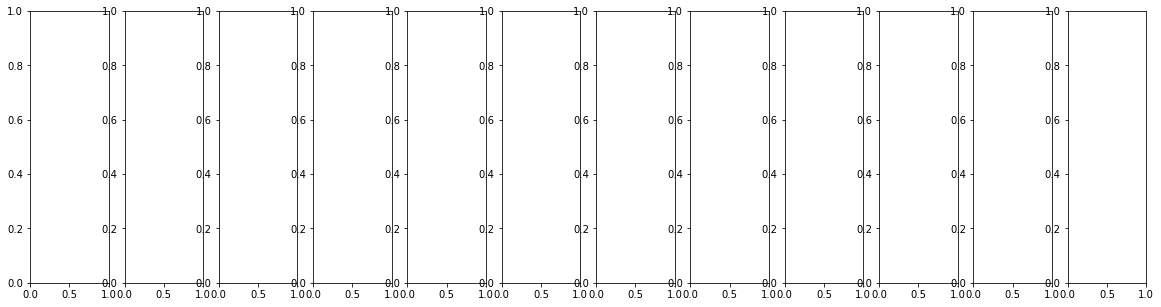

In [20]:
fig, (axes) = plt.subplots(nrows=1, ncols=12, figsize=(20, 5))

sns.boxplot(data=boston_df[['CRIM']],  palette='Set2', ax=axes[0]);
sns.boxplot(data=boston_df[['ZN']]  ,  palette='Set2', ax=axes[1]);
sns.boxplot(data=boston_df[['INDUS']], palette='Set2', ax=axes[2]);
sns.boxplot(data=boston_df[['CHAS']],  palette='Set2', ax=axes[3]);

sns.boxplot(data=boston_df[['NOX']],   palette='Set2', ax=axes[4]);
sns.boxplot(data=boston_df[['RM']]  ,  palette='Set2', ax=axes[5]);
sns.boxplot(data=boston_df[['AGE']],   palette='Set2', ax=axes[6]);
sns.boxplot(data=boston_df[['DIS']],   palette='Set2', ax=axes[7]);
sns.boxplot(data=boston_df[['RAD']],   palette='Set2', ax=axes[8]);
sns.boxplot(data=boston_df[['TAX']],   palette='Set2', ax=axes[9]);
#sns.boxplot(data=boston_df[['PTRATIO']],   palette='Set2', ax=axes[9]);
sns.boxplot(data=boston_df[['B']],     palette='Set2', ax=axes[10]);
sns.boxplot(data=boston_df[['LSTAT']], palette='Set2', ax=axes[11]);

In [ ]:
boston_df.columns

In [ ]:
# fig, axes = plt.subplots(ncols=9, figsize=(16, 5))
# n = 2

# sns.swarmplot(data=boston_df[['CRIM']],  palette='Set2', ax=axes[0], size=n);
# sns.swarmplot(data=boston_df[['ZN']]  ,  palette='Set2', ax=axes[1], size=n);
# sns.swarmplot(data=boston_df[['INDUS']], palette='Set2', ax=axes[2], size=n);
# sns.swarmplot(data=boston_df[['CHAS']],  palette='Set2', ax=axes[3], size=n);

# sns.swarmplot(data=boston_df[['NOX']],   palette='Set2', ax=axes[4], size=n);
# sns.swarmplot(data=boston_df[['RM']]  ,  palette='Set2', ax=axes[5], size=n);
# sns.swarmplot(data=boston_df[['AGE']],   palette='Set2', ax=axes[6], size=n);
# sns.swarmplot(data=boston_df[['DIS']],   palette='Set2', ax=axes[7], size=n);
# sns.swarmplot(data=boston_df[['B']],     palette='Set2', ax=axes[8], size=n);

#### Scatter plot-

In [21]:
boston_df.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
dtype: object

In [22]:
sns.pairplot(data=boston_df[['INDUS', 'TAX', 'AGE', 'NOX', 'RM' ]], height=3, diag_kind='kde');

KeyError: "None of [Index(['INDUS', 'TAX', 'AGE', 'NOX', 'RM'], dtype='object')] are in the [columns]"

#### Using Z-score method
The intuition behind Z-score is to describe any data point by finding their relationship with the Standard Deviation and Mean of the group of data points. Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution.

In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.

#### Example: z-scores of U.S. Heights
generate a pandas DataFrame to simulate heights of people from a normal distribution. 

`Note`: in order to calculate z-scores of values, you need a normal distribution.

In [23]:
np.random.seed(42)

population_size = 5000
df_heights      = pd.DataFrame(data={'height_inches': np.random.normal(loc=66, scale=2.9, size=population_size)})

In [24]:
df_heights.head()

,height_inches
0,67.440471
1,65.599034
2,67.878297
3,70.416787
4,65.320955


Visualize the distribution of df_heights values.

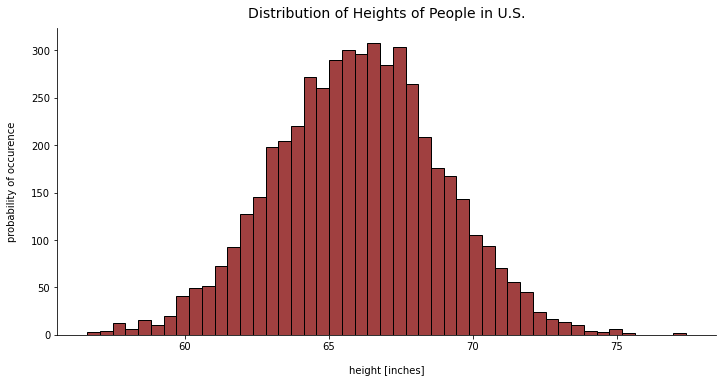

In [25]:
sns.displot(df_heights['height_inches'], color="maroon", height=5, aspect=2)

plt.xlabel("height [inches]", labelpad=14)
plt.ylabel("probability of occurence", labelpad=14)
plt.title("Distribution of Heights of People in U.S.", y=1.015, fontsize=14);

Calculate the population `mean height` in the using the pandas series mean() method.

In [26]:
pop_mean_us_height_inches = df_heights['height_inches'].mean()
pop_mean_us_height_inches

66.01624559725403

Calculate the population `standard deviation` height using the pandas series std() method.

In [27]:
pop_std_dev_us_height_inches = df_heights['height_inches'].std()
pop_std_dev_us_height_inches

2.889791503580723

Given any person's height, we can calculate the `number of standard deviations` that height is from the mean by using the z-score equation:

$$\Large z-{score}=\frac{x-\mu}{\sigma}$$

- $x$  is a score
- $σ$ is the population standard deviation
- $μ$ is the population mean

Create a new column z-score that's the z-score for each person's height.

In [28]:
df_heights['z-score'] = (df_heights['height_inches']-pop_mean_us_height_inches)/pop_std_dev_us_height_inches

In [29]:
df_heights.head()

,height_inches,z-score
0,67.440471,0.492847
1,65.599034,-0.144374
2,67.878297,0.644355
3,70.416787,1.522788
4,65.320955,-0.240602


Based on the z-scores computed, We can interpret the z-score values. For example, here's an interpretation for a few people:

In [30]:
for person in df_heights.itertuples():
    index_person        = 0
    index_height_inches = 1
    index_z_score       = 2
    
    index   = person[index_person]
    height  = round(person[index_height_inches], 2)
    z_score = round(person[index_z_score], 2)
    
    if index <= 4:
        print("person at index {0} has an height in inches of {1} and is approximately {2} standard deviations from population mean height".format(index, height, z_score))

person at index 0 has an height in inches of 67.44 and is approximately 0.49 standard deviations from population mean height
person at index 1 has an height in inches of 65.6 and is approximately -0.14 standard deviations from population mean height
person at index 2 has an height in inches of 67.88 and is approximately 0.64 standard deviations from population mean height
person at index 3 has an height in inches of 70.42 and is approximately 1.52 standard deviations from population mean height
person at index 4 has an height in inches of 65.32 and is approximately -0.24 standard deviations from population mean height


In a normal distribution, there is a standard range of values that generally fall within a certain number of standard deviations from the mean:

|% of total height values|	range in distribution	|z-scores from mean|
|------------------------|--------------------------|------------------|
|68|	μ±σ	|±1|
|95|	μ±1.96σ	|±1.96|
|99|	μ±2.58σ	|±2.58|

There are 5000 height values in this dataset. Therefore, it's likely approximately 68% of values are within ±1 z-scores from the mean. Let's verify this with our dataset.

In [31]:
values_plus_minus_one_z_score         = len(df_heights[df_heights['z-score'].between(-1, 1)==True])

percent_values_plus_minus_one_z_score = values_plus_minus_one_z_score/len(df_heights)*100
percent_values_plus_minus_one_z_score

68.56

Above, we standardized a distribution by getting every value's z-score. 

we can now visualize the distribution of z-scores below that correspond to specific height values. 

The histogram below looks like a `normal distribution`. The official term for it is a standard normal distribution.

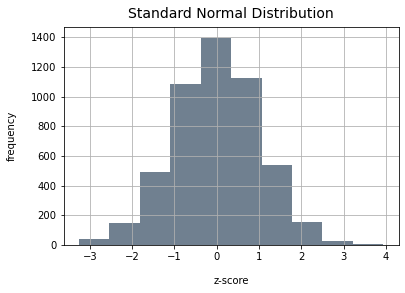

In [32]:
df_heights['z-score'].hist(color='slategray')

plt.title("Standard Normal Distribution", y=1.015, fontsize=14)
plt.xlabel("z-score", labelpad=14)
plt.ylabel("frequency", labelpad=14);

#### Comparison of Z-Scores from Two Populations
- Above, we had data on heights of people in the U.S. 

- My friend `Leslie` was born in the `U.S`. and is 63 inches. 
- other friend `Jamie` was born in the `Phillipines` and is 57 inches tall. 

- which of my friends is relatively taller for their respective country's height.

In [33]:
height_leslie_inches = 63
height_jamie_inches  = 57

To get the relative height for each population distribution, we'll calculate the z-score for each friend's height based on the country's population distribution using the z-score equation and round each value to two decimal places. 

For this example, we created normal distributions of heights for values in the Phillipines and United States.

Using the z-score allows standardization among the two distributions of heights in the U.S. and Phillipines so we can easily compare where Leslie and Jamie reside on each distribution.


In [34]:
df_heights['philippines_height_inches'] = np.random.normal(loc=61, scale=3.2, size=population_size)

The visualization below illustrates the distribution of heights for people in the U.S., Phillippines as well as Leslie's and Jamie's height.

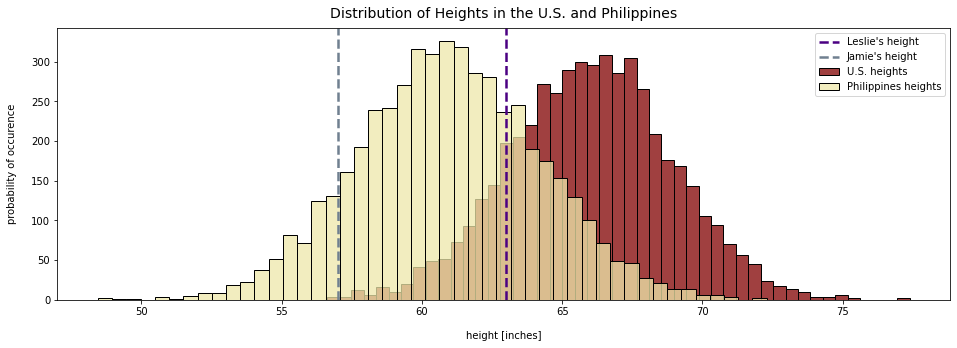

In [35]:
fig, ax = plt.subplots(1,1, figsize=(16,5))
sns.histplot(df_heights['height_inches'], color="maroon", label='U.S. heights', ax=ax)
sns.histplot(df_heights['philippines_height_inches'], color='palegoldenrod', label='Philippines heights', ax=ax)

plt.axvline(x=height_leslie_inches, linestyle='--', linewidth=2.5, label="Leslie's height", c='indigo')
plt.axvline(x=height_jamie_inches,  linestyle='--', linewidth=2.5, label="Jamie's height", c='slategrey')

plt.xlabel("height [inches]", labelpad=14)
plt.ylabel("probability of occurence", labelpad=14)
plt.title("Distribution of Heights in the U.S. and Philippines", y=1.015, fontsize=14)
plt.legend();

Calculate the population mean height in the Philippines using the pandas series mean() method.

In [37]:
pop_mean_philippines_height_inches = df_heights['philippines_height_inches'].mean()
pop_mean_philippines_height_inches

60.96840353016177

Calculate the population standard deviation height in the Philippines using the pandas series std() method.

In [38]:
pop_std_dev_philippines_height_inches = df_heights['philippines_height_inches'].std()
pop_std_dev_philippines_height_inches

3.2333986708154616

Below is a function to calculate a value's z-score.

In [39]:
def z_score(value, population_mean, population_std_dev):
    """
    Function to calculate z-score as observation's value minus population mean divided by population standard deviation.

    Round value to 2 decimal places.
    """
    return round((value - population_mean)/population_std_dev, 2)

In [40]:
z_score_leslie_us         = z_score(height_leslie_inches, pop_mean_us_height_inches, pop_std_dev_us_height_inches) 
z_score_jamie_philippines = z_score(height_jamie_inches, pop_mean_philippines_height_inches, pop_std_dev_philippines_height_inches)

print("Leslie has a z-score of {0} for her height relative to U.S. heights and Jamie has a z-score of {1} relative to Philippines heights.".format(z_score_leslie_us, z_score_jamie_philippines))

Leslie has a z-score of -1.04 for her height relative to U.S. heights and Jamie has a z-score of -1.23 relative to Philippines heights.


Since Leslie's z-score is larger (closer to 0), she's relatively taller compared to people in her country than Jamie is.

#### Probability Density Function

Above, we visualized the distribution of heights and included bars to indicate the frequency or probability for certain height values. 

We can visualize the same distribution below with probability of occurence on the y-axis and just include the `density curve`. 

The total area under this curve represents the probability of all outcomes happening which is equal to 1.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


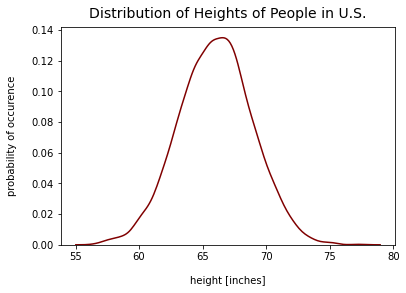

In [41]:
sns.distplot(df_heights['height_inches'], color="maroon", hist=False)

plt.xlabel("height [inches]", labelpad=14)
plt.ylabel("probability of occurence", labelpad=14)
plt.title("Distribution of Heights of People in U.S.", y=1.015, fontsize=14);

For any person's height, we can find the proportion of values greater than or less than that height by finding the appropriate area under the curve.

#### Probability of Occurence Given Z-Scores
With a normal distribution, given an observation's value, we can determine the proportion of observations above or below that value. 

The steps to do so are to calculate the observation's z-score and then find the appropriate area under the curve on one side of the value.

For example, Leslie's height is 63 inches. For what proportion of people is Leslie taller than in the U.S.?

In the scipy stats module, there's a norm (meaning a normal distribution) class with a `cdf` method that takes an argument of a z-score for an observation and returns the proportion of values less than that observation.

In [42]:
from scipy import stats

In [43]:
proportion_of_us_ppl_leslie_taller_than = round(stats.norm.cdf(z_score_leslie_us), 3)
proportion_of_us_ppl_leslie_taller_than

0.149

This proportion value of 0.149 is equivalent to 14.9%. Leslie is taller than just 14.9% of people in the U.S. and she ranks at the 14.9th percentile.

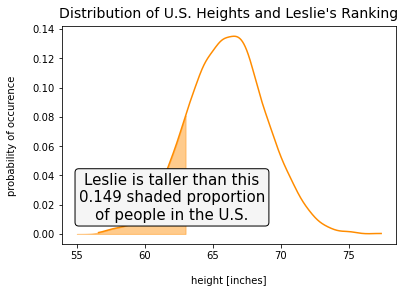

In [44]:
kde = stats.gaussian_kde(df_heights['height_inches'])
pos = np.linspace(df_heights['height_inches'].min(), df_heights['height_inches'].max(), 50000)

plt.plot(pos, kde(pos), color='darkorange')

shade = np.linspace(55, height_leslie_inches, 300)

plt.fill_between(shade, kde(shade), alpha=0.45, color='darkorange',)

plt.text(x=62, y=.010, horizontalalignment='center', fontsize=15, 
         s="Leslie is taller than this\n{0} shaded proportion\nof people in the U.S.".format(proportion_of_us_ppl_leslie_taller_than), 
         bbox=dict(facecolor='whitesmoke', boxstyle="round, pad=0.25"))

plt.title("Distribution of U.S. Heights and Leslie's Ranking", fontsize=14, y=1.012)
plt.xlabel("height [inches]", labelpad=15)
plt.ylabel("probability of occurence", labelpad=15);

#### Example on boston dataset

In [45]:
boston_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


.. back to  boston example

In [46]:
from scipy import stats

In [47]:
z = np.abs(stats.zscore(boston_df))

In [48]:
boston_df.shape, z.shape

((506, 13), (506, 13))

In [49]:
z

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.419782,0.284830,1.287909,0.272599,0.144217,0.413672,0.120013,0.140214,0.982843,0.666608,1.459000,0.441052,1.075562
1,0.417339,0.487722,0.593381,0.272599,0.740262,0.194274,0.367166,0.557160,0.867883,0.987329,0.303094,0.441052,0.492439
2,0.417342,0.487722,0.593381,0.272599,0.740262,1.282714,0.265812,0.557160,0.867883,0.987329,0.303094,0.396427,1.208727
3,0.416750,0.487722,1.306878,0.272599,0.835284,1.016303,0.809889,1.077737,0.752922,1.106115,0.113032,0.416163,1.361517
4,0.412482,0.487722,1.306878,0.272599,0.835284,1.228577,0.511180,1.077737,0.752922,1.106115,0.113032,0.441052,1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.413229,0.487722,0.115738,0.272599,0.158124,0.439316,0.018673,0.625796,0.982843,0.803212,1.176466,0.387217,0.418147
502,0.415249,0.487722,0.115738,0.272599,0.158124,0.234548,0.288933,0.716639,0.982843,0.803212,1.176466,0.441052,0.500850
503,0.413447,0.487722,0.115738,0.272599,0.158124,0.984960,0.797449,0.773684,0.982843,0.803212,1.176466,0.441052,0.983048
504,0.407764,0.487722,0.115738,0.272599,0.158124,0.725672,0.736996,0.668437,0.982843,0.803212,1.176466,0.403225,0.865302


In [50]:
threshold = 3

result = np.where(z > 3)
result

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
        200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
        220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
        277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
        357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
        380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
        416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
        437, 438, 445, 450, 454, 455, 456, 457, 466]),
 array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
         1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
         5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
         3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
         0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
        11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11

In [51]:
len(result[0]), len(result[1])

(100, 100)

In [52]:
outlier_df = pd.DataFrame(data=result[0], columns=['ROWNUM'])

outlier_df['COLNUM'] = result[1]
outlier_df.head()

,ROWNUM,COLNUM
0,55,1
1,56,1
2,57,1
3,102,11
4,141,12


In [53]:
outlier_df.COLNUM.value_counts()

3     35
11    25
1     14
5      8
0      8
12     5
7      5
Name: COLNUM, dtype: int64

In [54]:
columns = boston_df.columns
columns

RangeIndex(start=0, stop=13, step=1)

In [55]:
outlier_df['COLNAME'] = columns[outlier_df.COLNUM]
outlier_df.head()

,ROWNUM,COLNUM,COLNAME
0,55,1,1
1,56,1,1
2,57,1,1
3,102,11,11
4,141,12,12


In [56]:
for colname in outlier_df.COLNAME.unique():
    # get the rows from the main boston_df 
    outliers_rows = boston_df.loc[outlier_df.loc[outlier_df.COLNAME==colname, 'ROWNUM']]
    
    print(outliers_rows)

          0      1     2    3       4      5     6        7    8      9   \
55   0.01311   90.0  1.22  0.0  0.4030  7.249  21.9   8.6966  5.0  226.0   
56   0.02055   85.0  0.74  0.0  0.4100  6.383  35.7   9.1876  2.0  313.0   
57   0.01432  100.0  1.32  0.0  0.4110  6.816  40.5   8.3248  5.0  256.0   
199  0.03150   95.0  1.47  0.0  0.4030  6.975  15.3   7.6534  3.0  402.0   
200  0.01778   95.0  1.47  0.0  0.4030  7.135  13.9   7.6534  3.0  402.0   
201  0.03445   82.5  2.03  0.0  0.4150  6.162  38.4   6.2700  2.0  348.0   
202  0.02177   82.5  2.03  0.0  0.4150  7.610  15.7   6.2700  2.0  348.0   
203  0.03510   95.0  2.68  0.0  0.4161  7.853  33.2   5.1180  4.0  224.0   
204  0.02009   95.0  2.68  0.0  0.4161  8.034  31.9   5.1180  4.0  224.0   
256  0.01538   90.0  3.75  0.0  0.3940  7.454  34.2   6.3361  3.0  244.0   
283  0.01501   90.0  1.21  1.0  0.4010  7.923  24.8   5.8850  1.0  198.0   
284  0.00906   90.0  2.97  0.0  0.4000  7.088  20.8   7.3073  1.0  285.0   
347  0.01870

## IQR score -

Observations below Q1- 1.5 IQR, or those above Q3 + 1.5IQR are defined as outliers.

In [57]:
Q1 = boston_df.quantile(0.25)
Q3 = boston_df.quantile(0.75)

In [58]:
IQR = Q3 - Q1

print(IQR)

0       3.595038
1      12.500000
2      12.910000
3       0.000000
4       0.175000
5       0.738000
6      49.050000
7       3.088250
8      20.000000
9     387.000000
10      2.800000
11     20.847500
12     10.005000
dtype: float64


we will get IQR for each column.

In [59]:
boston_df.describe()


,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


get outlier row indexes for CRIM col

In [60]:
col_name = 'CRIM'

low  = Q1[col_name] - 1.5 * IQR[col_name]
high = Q3[col_name] + 1.5 * IQR[col_name]

low, high

KeyError: 'CRIM'

In [61]:
# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
query_string = '{} < @low or {} > @high'.format(col_name, col_name)

outlier_arr1 = boston_df.query(query_string).index
outlier_arr1

UndefinedVariableError: name 'CRIM' is not defined

In [ ]:
xdf = pd.DataFrame(boston_df.query(query_string)['CRIM'], columns=['col_val'])
xdf['outlier_pos'] = 'low'
xdf['col_name'] = 'CRIM'

In [62]:
xdf.head(10)

NameError: name 'xdf' is not defined

get outlier row indexes for ZN col

In [63]:
col_name = 'ZN'
low  = Q1[col_name] - 1.5 * IQR[col_name]
high = Q3[col_name] + 1.5 * IQR[col_name]

low, high

KeyError: 'ZN'

In [64]:
col_name = 'ZN'
query_string = '{} < @low or {} > @high'.format(col_name, col_name)
query_string

'ZN < @low or ZN > @high'

In [65]:
# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
query_string = '{} < @low or {} > @high'.format(col_name, col_name)

outlier_arr2 = boston_df.query(query_string).index
outlier_arr2

UndefinedVariableError: name 'ZN' is not defined

In [66]:
outlier_arr1.union(outlier_arr2)

NameError: name 'outlier_arr1' is not defined

get outlier row indexes for all cols

In [67]:
init = False

for col_name in list(boston_df.columns):

    low  = Q1[col_name] - 1.5 * IQR[col_name]
    high = Q3[col_name] + 1.5 * IQR[col_name]

    query_string = '{} < @low or {} > @high'.format(col_name, col_name)

    outlier_arr_loop = boston_df.query(query_string).index
    
    if not init:
        outlier_arr = outlier_arr_loop
        init = True
    
    outlier_arr = outlier_arr.union(outlier_arr_loop)

KeyError: False

In [ ]:
len(outlier_arr)

In [68]:
boston_df.iloc[outlier_arr].head(10)

NameError: name 'outlier_arr' is not defined

#### Deeper outlier analysis

In [69]:
init = False
outliers_arr_low  = pd.DataFrame()
outliers_arr_high = pd.DataFrame()

outliers_arr      = pd.DataFrame(columns=['col_val', 'outlier_pos', 'outlier_val', 'col_name'])

for col_name in list(boston_df.columns):

    low  = Q1[col_name] - 1.5 * IQR[col_name]
    high = Q3[col_name] + 1.5 * IQR[col_name]

    query_string_low  = '{} < @low'.format(col_name)
    query_string_high = '{} > @high'.format(col_name)
    
    # below low outliers     
    outliers_arr_low = pd.DataFrame(boston_df.query(query_string_low)[col_name])
    # , columns=['col_val']
    outliers_arr_low['outlier_pos'] = 'low'
    outliers_arr_low['outlier_val'] = low
    outliers_arr_low['col_name']    = col_name
  
    # above high outliers
    outliers_arr_high = pd.DataFrame(boston_df.query(query_string_high)[col_name])
    # , columns=['col_val']
    outliers_arr_high['outlier_pos'] = 'high'
    outliers_arr_high['outlier_val'] = high
    outliers_arr_high['col_name']    = col_name
    
#     if outliers_arr.empty:
#         outliers_arr = outliers_arr_low.copy()
#     else:
    outliers_arr = pd.concat([outliers_arr, outliers_arr_low], ignore_index=False)
    
    outliers_arr = pd.concat([outliers_arr, outliers_arr_high], ignore_index=False ) 

KeyError: False

In [ ]:
outliers_arr

# Example 2

#### Parametric methods: Univariate
Create a dummy dataframe where features have normal distributions to practice parametric methods.

In [ ]:
# seed for reproducibility
np.random.seed(42)

n_feats=4

# dummydf = pd.DataFrame(np.random.normal(scale=10.0, size=(1000, n_feats)),
#                        columns=['feature{}'.format(i) for i in range(n_feats)])

dummydf = pd.DataFrame(np.random.normal(scale=10.0, 
                                        size=(1000, n_feats)),
                       columns=['feature0', 'feature1', 'feature3', 'features4' ])

In [ ]:
dummydf.head(5)

In [ ]:
# all normally distributed
dummydf.hist(figsize=(9,6), xlabelsize = 8);

In [ ]:
# # enough variation between features to show outliers
dummydf.describe()

#### Define two functions that statistically identify outliers in a pandas Series using a standard deviation and interquartile range method.

In [ ]:
def out_std(s, nstd=3.0):
    # , return_thresholds=False
    
    """
    Return a boolean mask of outliers for a series
    using standard deviation, works column-wise.
    
    param nstd:
        Set number of standard deviations from the mean to consider an outlier
        :type nstd: ``float``
    
    param return_thresholds:
        True returns the lower and upper bounds, good for plotting.
        False returns the masked array 
        :type return_thresholds: ``bool``
    """
    data_mean, data_std = s.mean(), s.std()
    
    cut_off = data_std * nstd
    
    lower, upper = data_mean - cut_off, data_mean + cut_off
    
#     if return_thresholds:
#         return lower, upper
#     else:
#         return [True if x < lower or x > upper else False for x in s]
    return lower, upper, [True if x < lower or x > upper else False for x in s]

In [ ]:
def out_iqr(s, k=1.5, return_thresholds=False):
    """
    Return a boolean mask of outliers for a series
    using interquartile range, works column-wise.
    param k:
        some cutoff to multiply by the iqr
    :type k: ``float``
    param return_thresholds:
        True returns the lower and upper bounds, good for plotting.
        False returns the masked array 
    :type return_thresholds: ``bool``
    """
    # calculate interquartile range
    q25, q75 = np.percentile(s, 25), np.percentile(s, 75)
    iqr = q75 - q25
    
    # calculate the outlier cutoff
    cut_off = iqr * k
    lower, upper = q25 - cut_off, q75 + cut_off
    
    if return_thresholds:
        return lower, upper
    else: # identify outliers
        return [True if x < lower or x > upper else False for x in s]

#### Standard Deviation method

In [ ]:
# outlier_mask is a boolean list identifies the indices of the outliers
lower, upper, outlier_mask = out_std(dummydf['feature0'], nstd=3)

# first 10 elements
print(lower, upper)
outlier_mask[:10]

In [ ]:
# get all the outlier data

#dummydf['feature0'][outlier_mask]
dummydf.loc[outlier_mask, ['feature0']]

In [ ]:
# python list gets the first index
outlier_mask.index(True)

In [ ]:
# convert the outlier_mask to numpy array
np_outlier_mask = np.array(outlier_mask)

np.where(np_outlier_mask == True)

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(dummydf['feature0'], kde=False);
plt.vlines(dummydf['feature0'][outlier_mask], ymin=0, ymax=110, linestyles='dashed');

-------------------------
#### Summary
--------------------------

- we took the boston dataset
- analyzed the columns for outliers
    - IQR and Z-score methods
        - possible row number and columns which can be outliers
            - subject of further column wise analysis
- Analysis is column wise
- Is that enough? (does it really identify the outlier in true?)
